# Packages

In [1]:
using Pkg
Pkg.instantiate()
# Pkg.add("Revise")
using Revise
Pkg.activate("../")
using Antique
using CairoMakie

  Activating project at `C:\Users\user\Desktop\GitHub\Antique.jl`


# InfinitePotentialWell

In [2]:
using Antique
IPW = InfinitePotentialWell(L=1.0, m=1.0, ℏ=1.0)

InfinitePotentialWell(1.0, 1.0, 1.0)

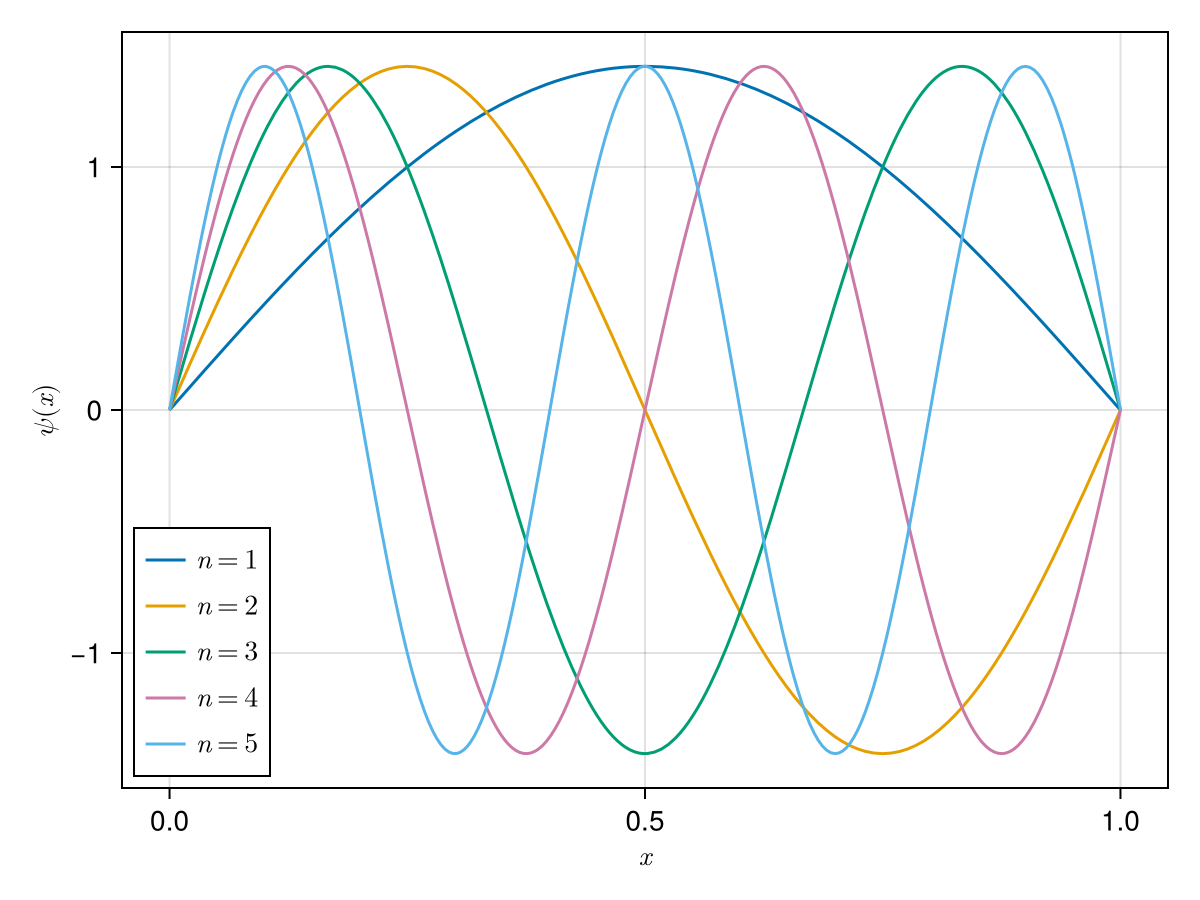

In [3]:
using CairoMakie

# settings
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$\psi(x)$")

# plot
w1 = lines!(ax, 0..1, x -> ψ(IPW, x, n=1))
w2 = lines!(ax, 0..1, x -> ψ(IPW, x, n=2))
w3 = lines!(ax, 0..1, x -> ψ(IPW, x, n=3))
w4 = lines!(ax, 0..1, x -> ψ(IPW, x, n=4))
w5 = lines!(ax, 0..1, x -> ψ(IPW, x, n=5))

# legend
axislegend(ax, [w1, w2, w3, w4, w5], [L"n=1", L"n=2", L"n=3", L"n=4", L"n=5"], position=:lb)

f

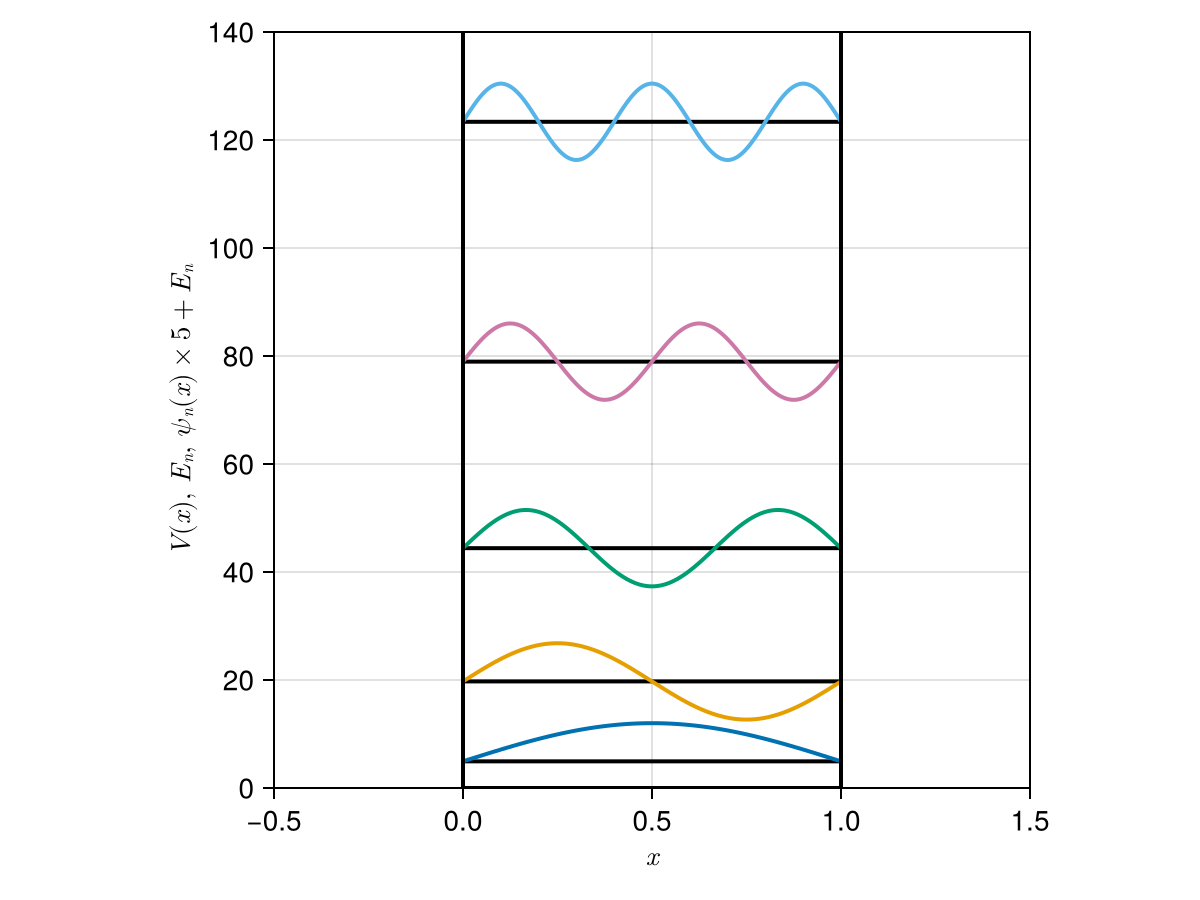

In [4]:
using CairoMakie

# settings
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x),~E_n,~\psi_n(x) \times 5 + E_n$", aspect=1, limits=(-0.5,1.5,0,140))
# hidespines!(ax)
# hidedecorations!(ax)

# plot
for n in 1:5
  # energy
  lines!(ax, [0,IPW.L], fill(E(IPW,n=n),2), color=:black, linewidth=2)
  # wave function
  lines!(ax, 0..IPW.L, x -> E(IPW,n=n) + 5*ψ(IPW,x,n=n), linewidth=2)
end

#potential
lines!(ax, [0,0,IPW.L,IPW.L], [140,0,0,140], color=:black, linewidth=2)

f

# DeltaPotential

In [5]:
using Antique
DP = DeltaPotential(α=1.0, m=1.0, ℏ=1.0)

DeltaPotential(1.0, 1.0, 1.0)

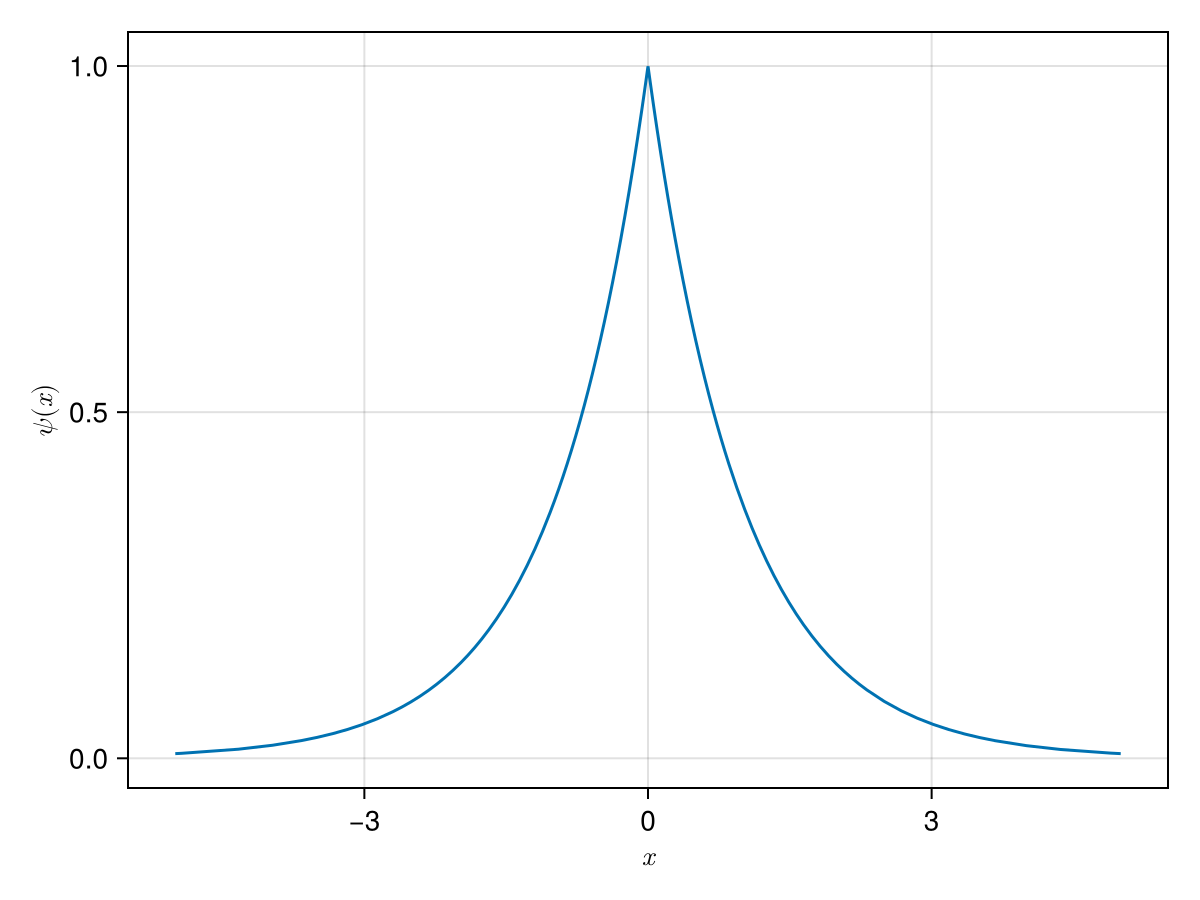

In [6]:
using CairoMakie

# setting
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$\psi(x)$")

# plot
w = lines!(ax, -5..5, x -> ψ(DP, x))

f

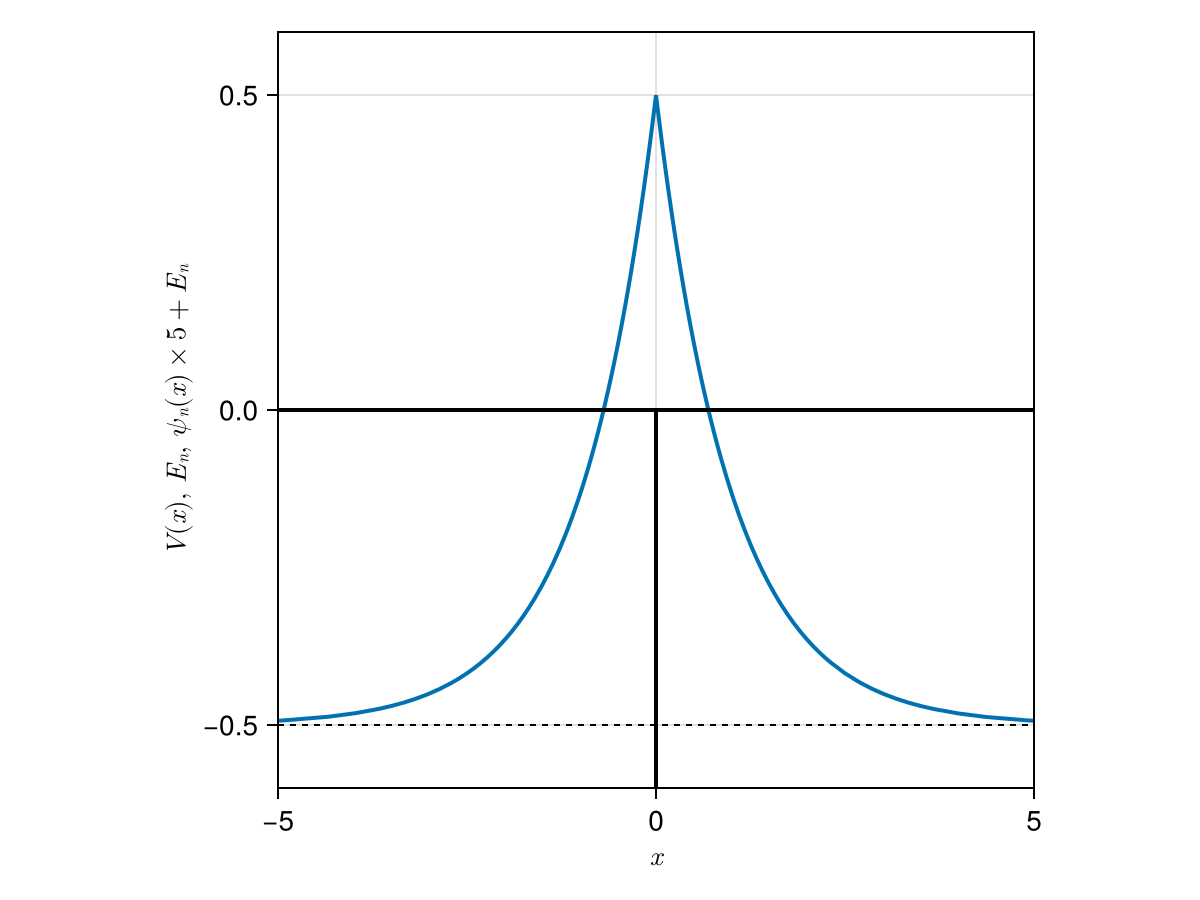

In [7]:
using CairoMakie

# settings
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x),~E_n,~\psi_n(x) \times 5 + E_n$", aspect=1, limits=(-5,5,-0.6,0.6))
# hidespines!(ax)
# hidedecorations!(ax)

# energy
hlines!(ax, E(DP), color=:black, linewidth=1, linestyle=:dash)

# wave function
lines!(ax, -5..5, x -> E(DP) + ψ(DP,x), linewidth=2)

#potential
lines!(ax, [-5,0,0,0,5], [0,0,-1,0,0], color=:black, linewidth=2)

f

# HarmonicOscillator

In [8]:
using Antique
HO = HarmonicOscillator(k=1.0, m=1.0, ℏ=1.0)

HarmonicOscillator(1.0, 1.0, 1.0)

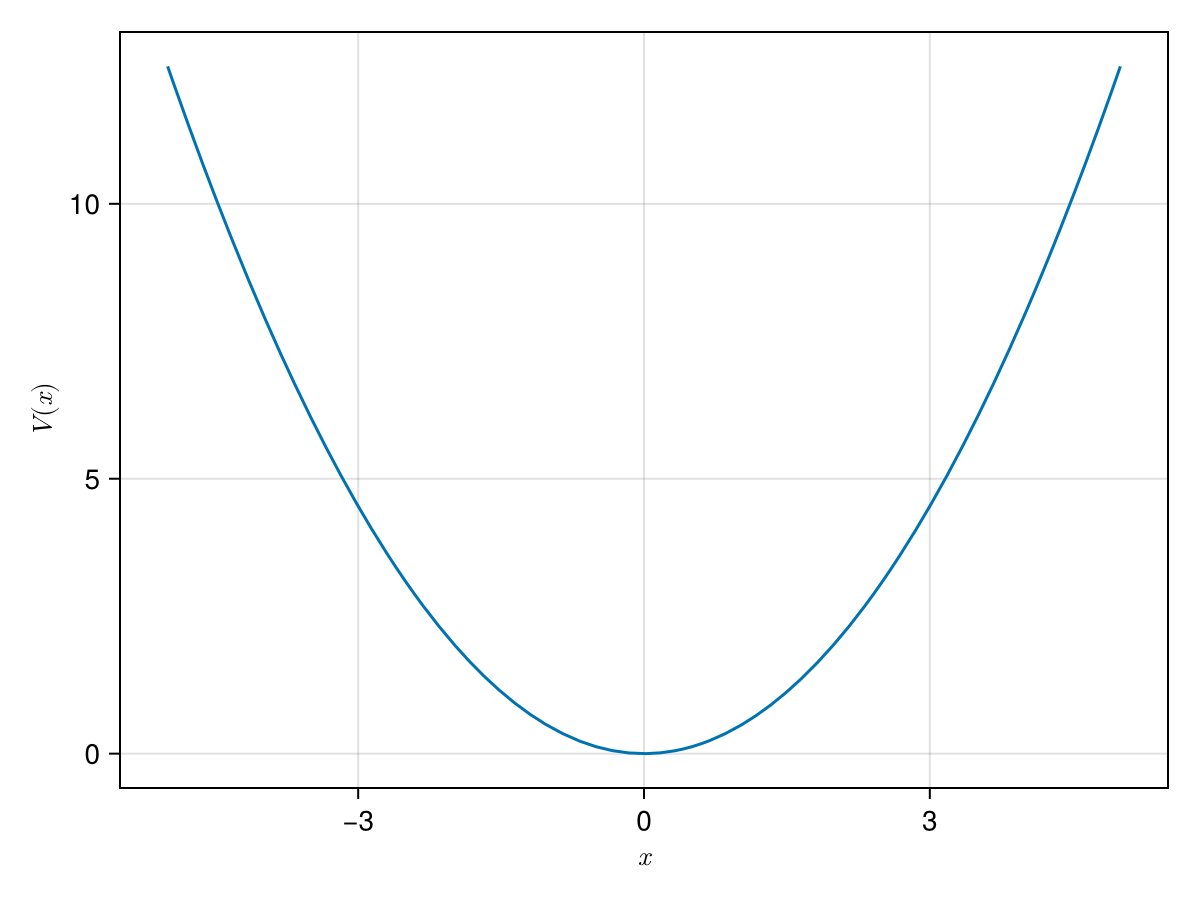

In [9]:
using CairoMakie

f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x)$")
lines!(ax, -5..5, x -> V(HO, x))
f

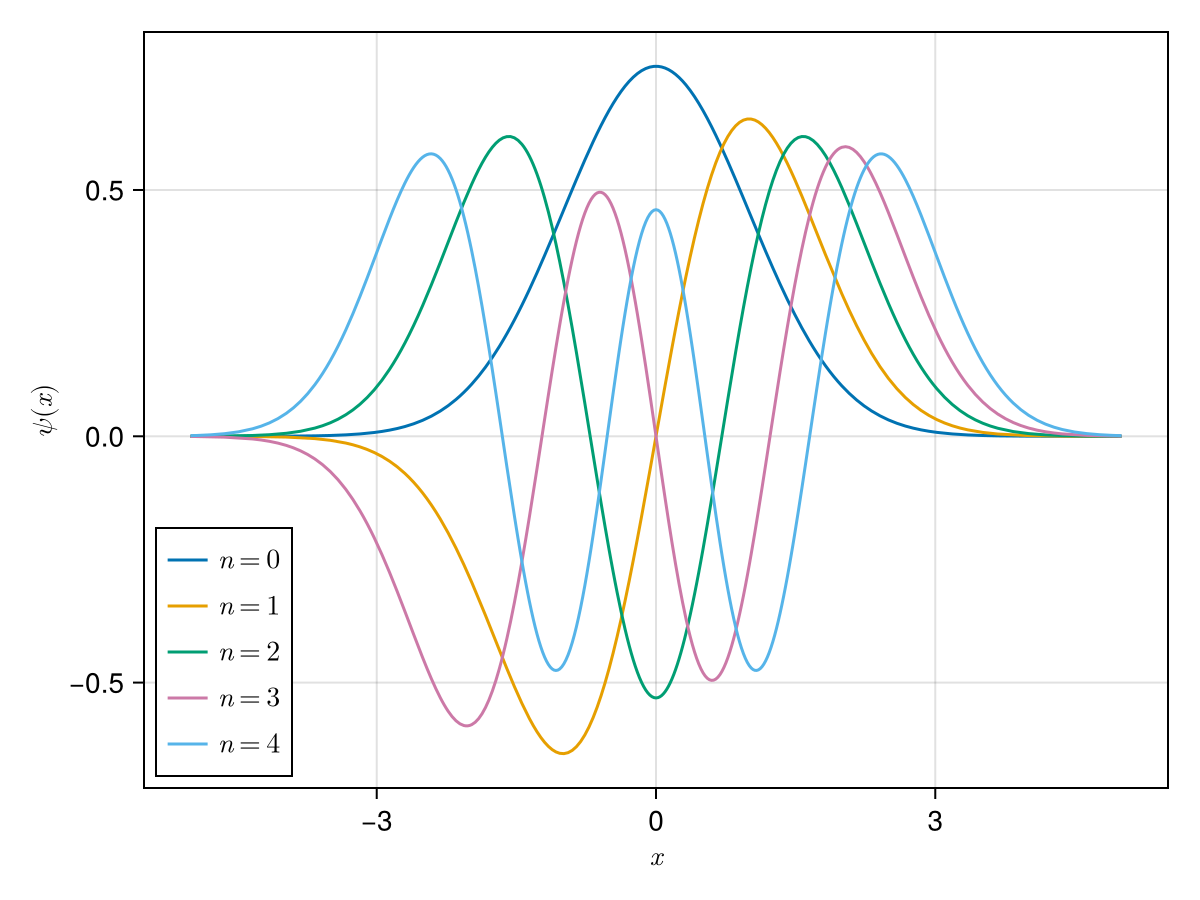

In [10]:
using CairoMakie

# setting
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$\psi(x)$")

# plot
w0 = lines!(ax, -5..5, x -> ψ(HO, x, n=0))
w1 = lines!(ax, -5..5, x -> ψ(HO, x, n=1))
w2 = lines!(ax, -5..5, x -> ψ(HO, x, n=2))
w3 = lines!(ax, -5..5, x -> ψ(HO, x, n=3))
w4 = lines!(ax, -5..5, x -> ψ(HO, x, n=4))

# legend
axislegend(ax, [w0, w1, w2, w3, w4], [L"n=0", L"n=1", L"n=2", L"n=3", L"n=4"], position=:lb)

f

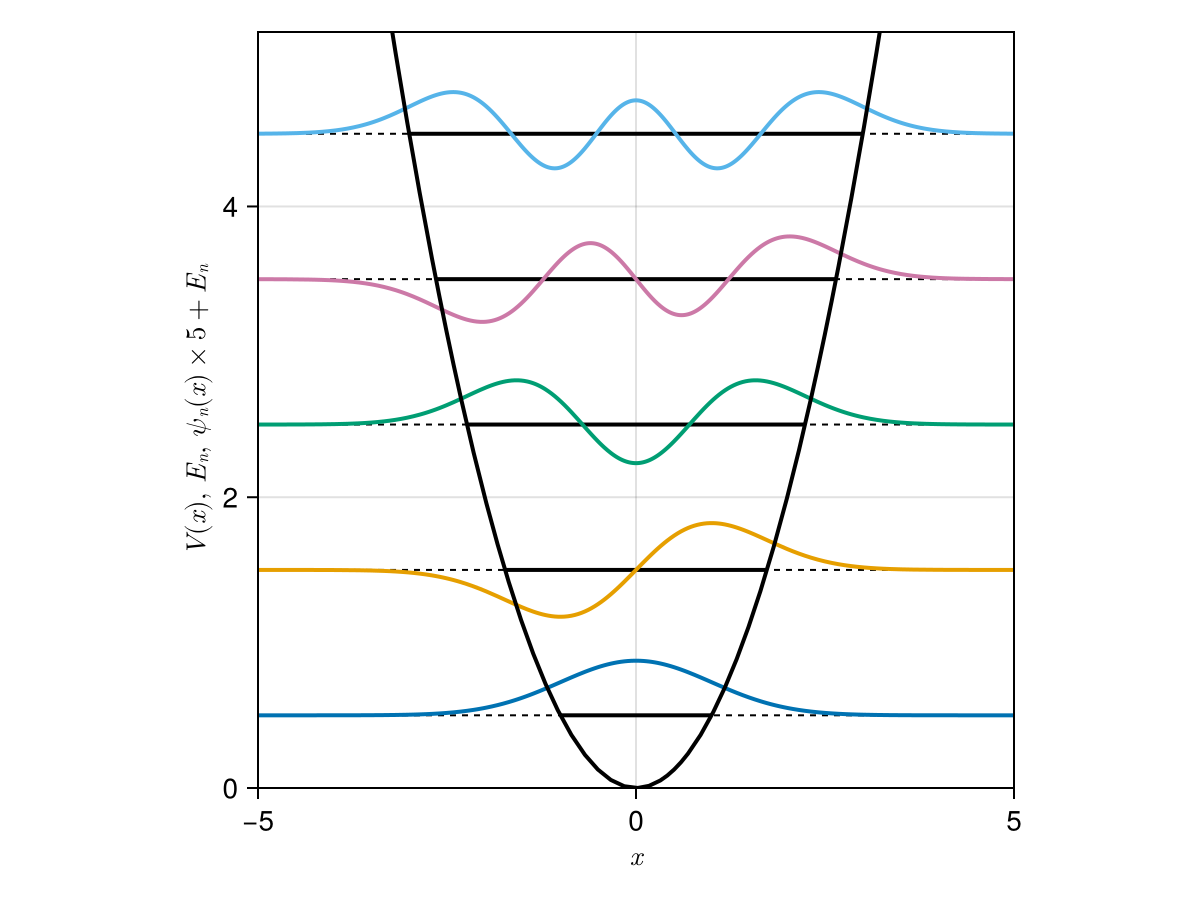

In [11]:
using CairoMakie

# settings
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x),~E_n,~\psi_n(x) \times 5 + E_n$", aspect=1, limits=(-5,5,0,5.2))
# hidespines!(ax)
# hidedecorations!(ax)

for n in 0:4
  # classical turning point
  xE = sqrt(2*HO.k*E(HO, n=n))
  # energy
  lines!(ax, [-xE,xE], fill(E(HO,n=n),2), color=:black, linewidth=2)
  hlines!(ax, E(HO, n=n), color=:black, linewidth=1, linestyle=:dash)
  # wave function
  lines!(ax, -5..5, x -> E(HO,n=n) + 0.5*ψ(HO,x,n=n), linewidth=2)
end

#potential
lines!(ax, -5..5, x -> V(HO, x), color=:black, linewidth=2)

f

# PoschlTeller

In [12]:
using Antique
PT = PoschlTeller(λ=4.0)
@show nₘₐₓ(PT)

nₘₐₓ(PT) = 3


3

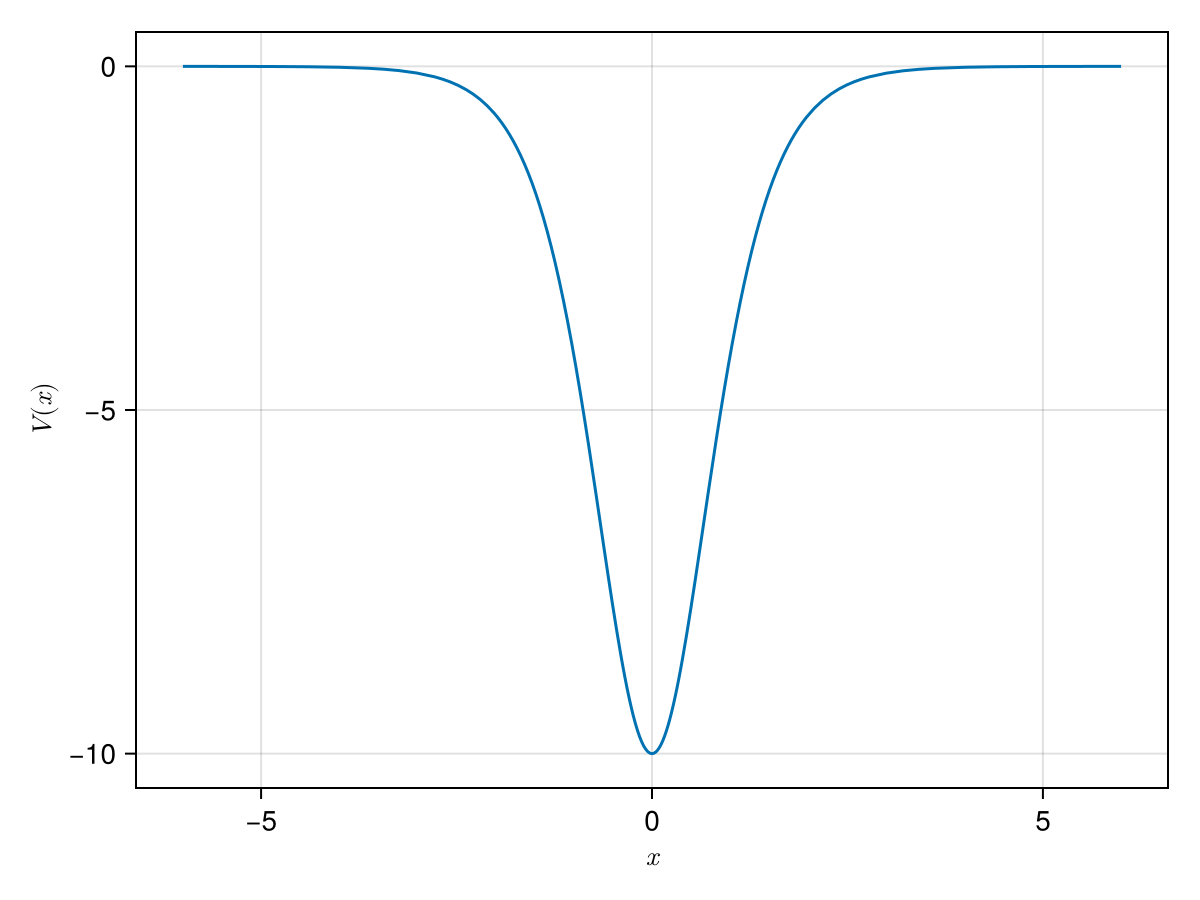

In [13]:
using CairoMakie

f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x)$")
lines!(ax, -6..6, x -> V(PT, x))
f

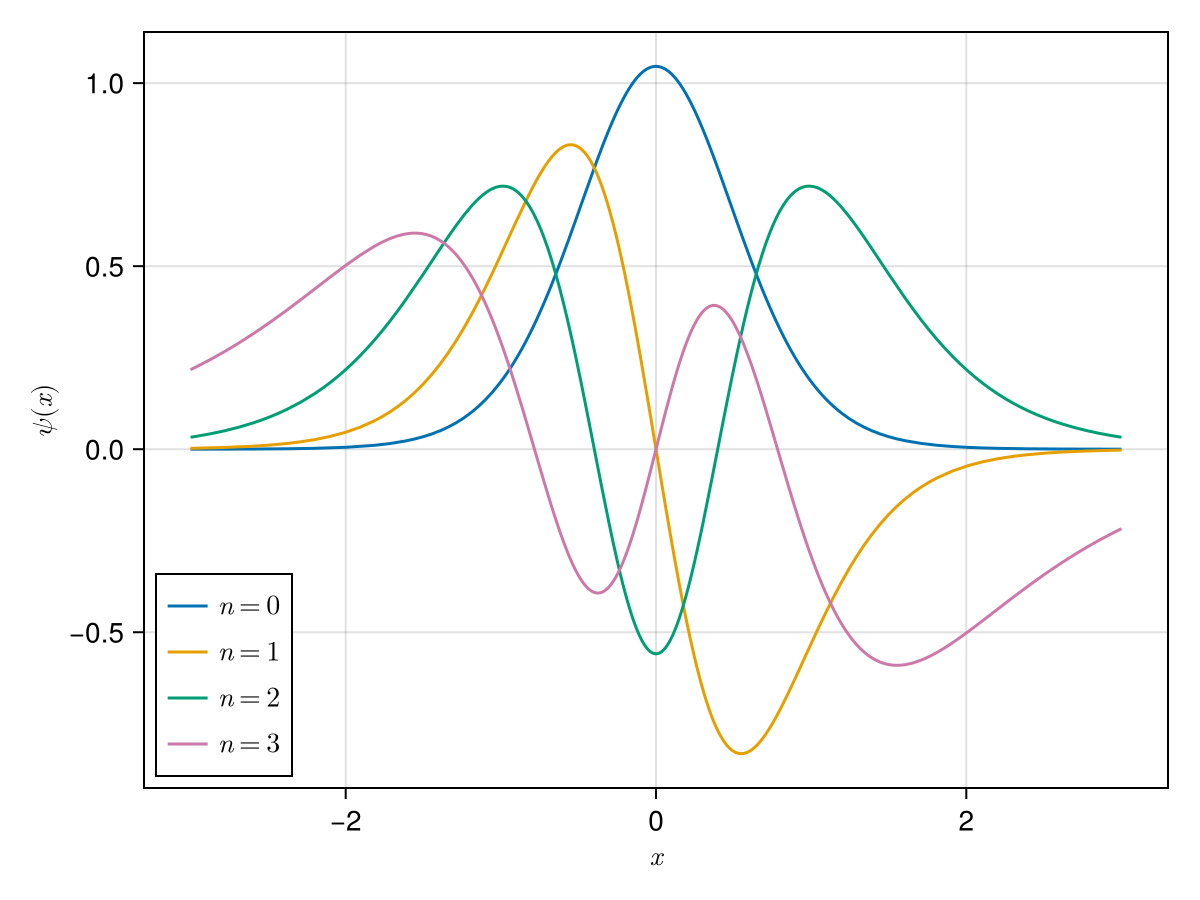

In [14]:
using CairoMakie

# setting
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$\psi(x)$")

# plot
w0 = lines!(ax, -3..3, x -> ψ(PT, x, n=0))
w1 = lines!(ax, -3..3, x -> ψ(PT, x, n=1))
w2 = lines!(ax, -3..3, x -> ψ(PT, x, n=2))
w3 = lines!(ax, -3..3, x -> ψ(PT, x, n=3))

# legend
axislegend(ax, [w0, w1, w2, w3], [L"n=0", L"n=1", L"n=2", L"n=3"], position=:lb)

f

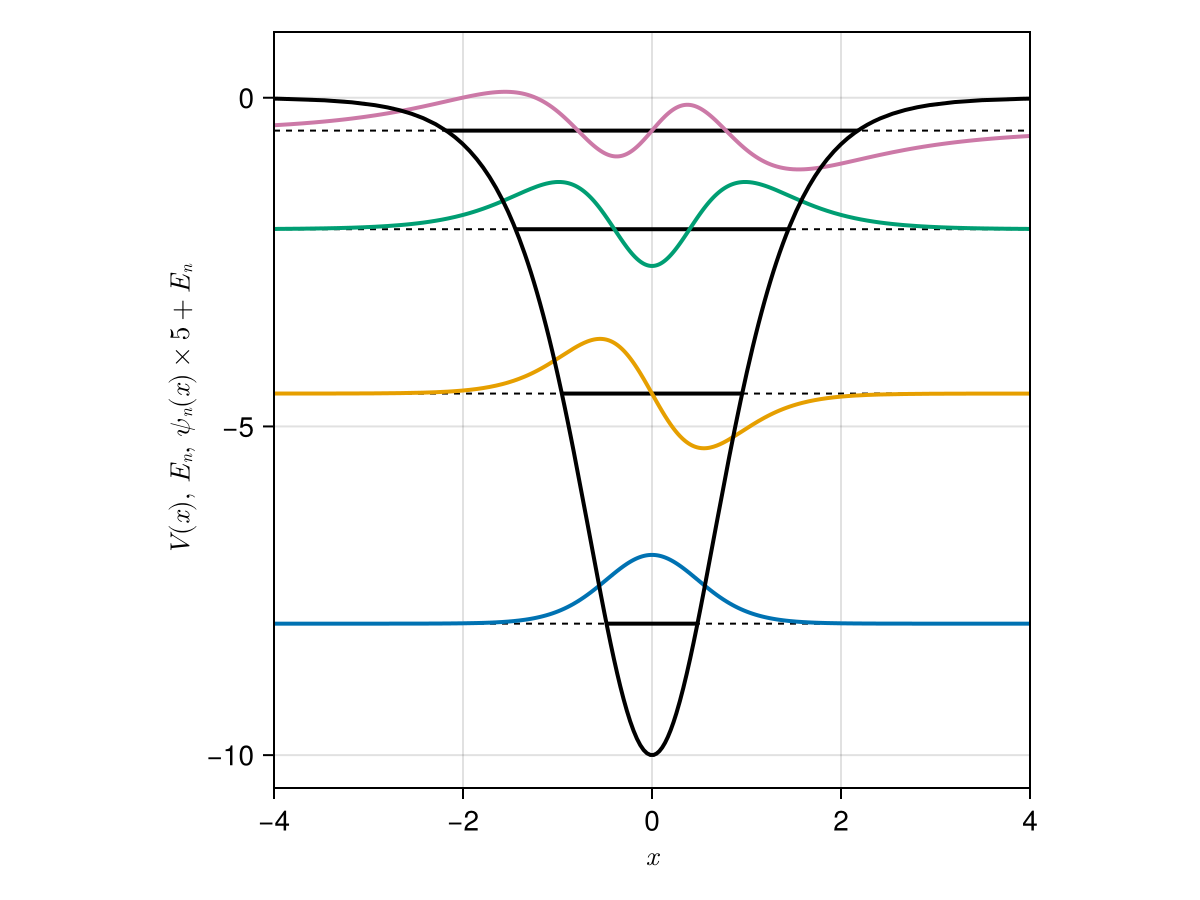

In [15]:
using CairoMakie

# settings
f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x),~E_n,~\psi_n(x) \times 5 + E_n$", aspect=1, limits=(-4,4,-10.5,1))
# hidespines!(ax)
# hidedecorations!(ax)

for n in 0:3
  # classical turning point
  xE = acosh(sqrt(PT.λ*(PT.λ+1)/abs(E(PT,n=n))/2))
  # energy
  hlines!(ax, E(PT, n=n), color=:black, linewidth=1, linestyle=:dash)
  lines!(ax, [-xE,xE], fill(E(PT,n=n),2), color=:black, linewidth=2)
  # wave function
  lines!(ax, -4..4, x -> E(PT,n=n) + ψ(PT,x,n=n), linewidth=2)
end

#potential
lines!(ax, -4..4, x -> V(PT,x), color=:black, linewidth=2)

f

# MorsePotential

In [16]:
using Antique
MP = MorsePotential()

MorsePotential(1.997193319969992, 0.10263461910653993, 0.1027265041900817, 918.076336715, 1.0)

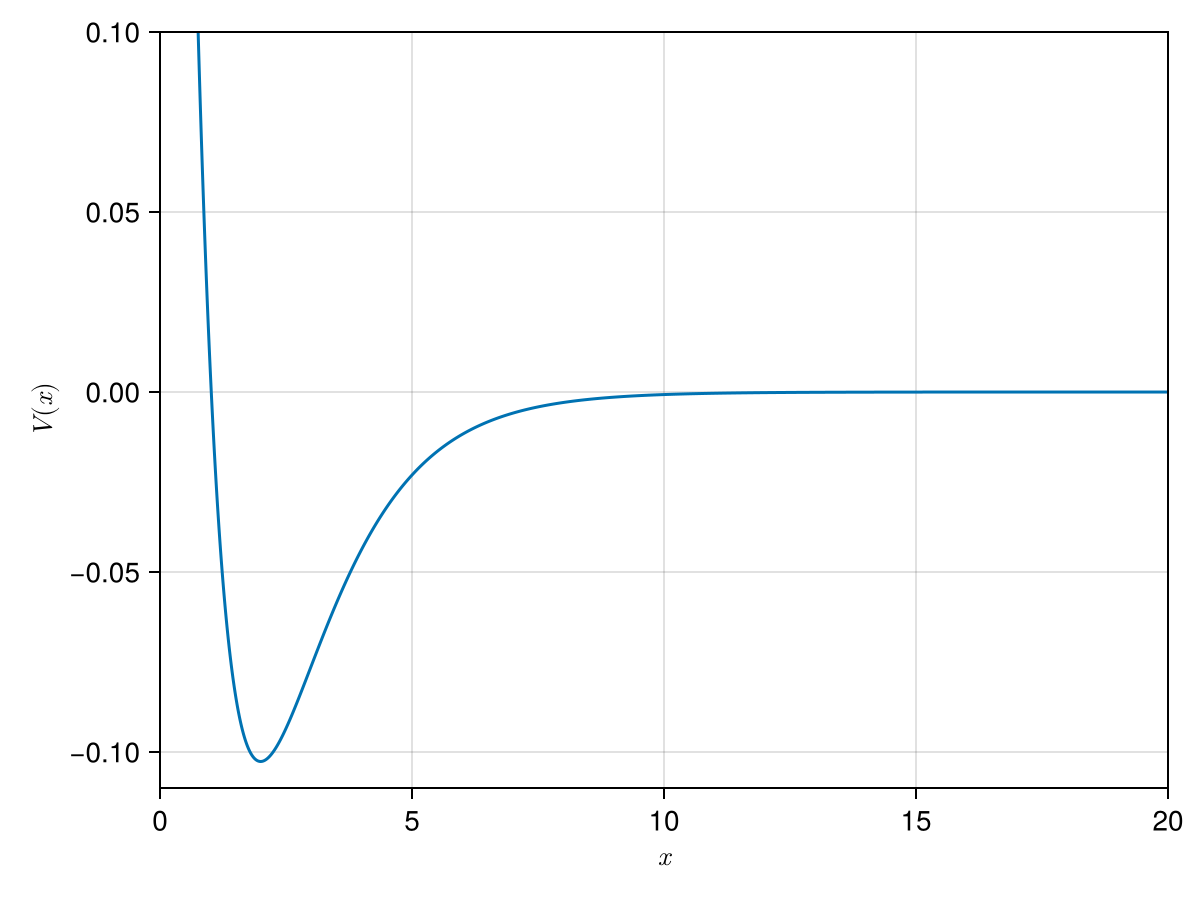

In [17]:
using CairoMakie

f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x)$",  limits=(0.0,20.0,-0.11,0.1))
lines!(ax, 0.1:0.01:20, r -> V(MP, r))
f

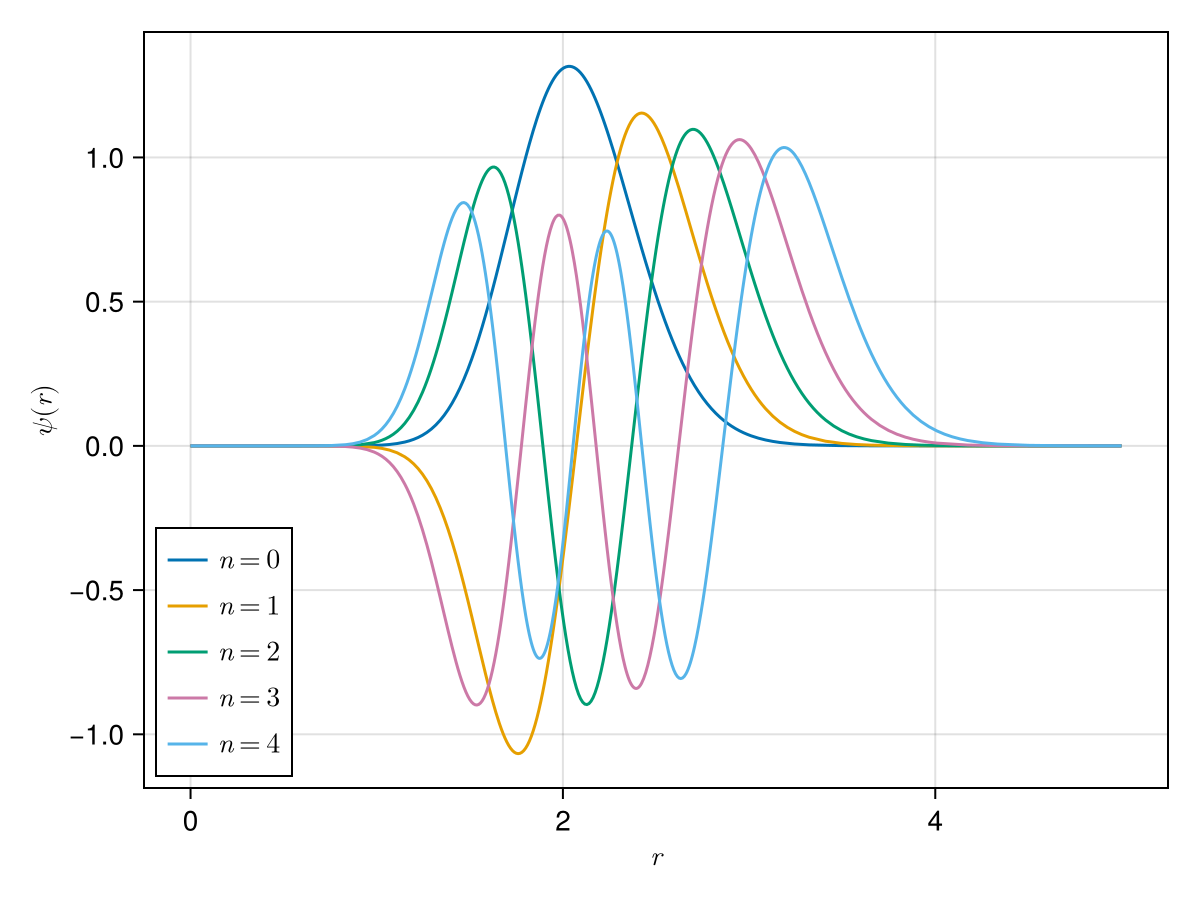

In [18]:
using CairoMakie

# setting
f = Figure()
ax = Axis(f[1,1], xlabel=L"$r$", ylabel=L"$\psi(r)$")

# plot
w0 = lines!(ax, 0..5, x -> ψ(MP, x, n=0))
w1 = lines!(ax, 0..5, x -> ψ(MP, x, n=1))
w2 = lines!(ax, 0..5, x -> ψ(MP, x, n=2))
w3 = lines!(ax, 0..5, x -> ψ(MP, x, n=3))
w4 = lines!(ax, 0..5, x -> ψ(MP, x, n=4))

# legend
axislegend(ax, [w0, w1, w2, w3, w4], [L"n=0", L"n=1", L"n=2", L"n=3", L"n=4"], position=:lb)

f

nₘₐₓ(MP) = 5
5


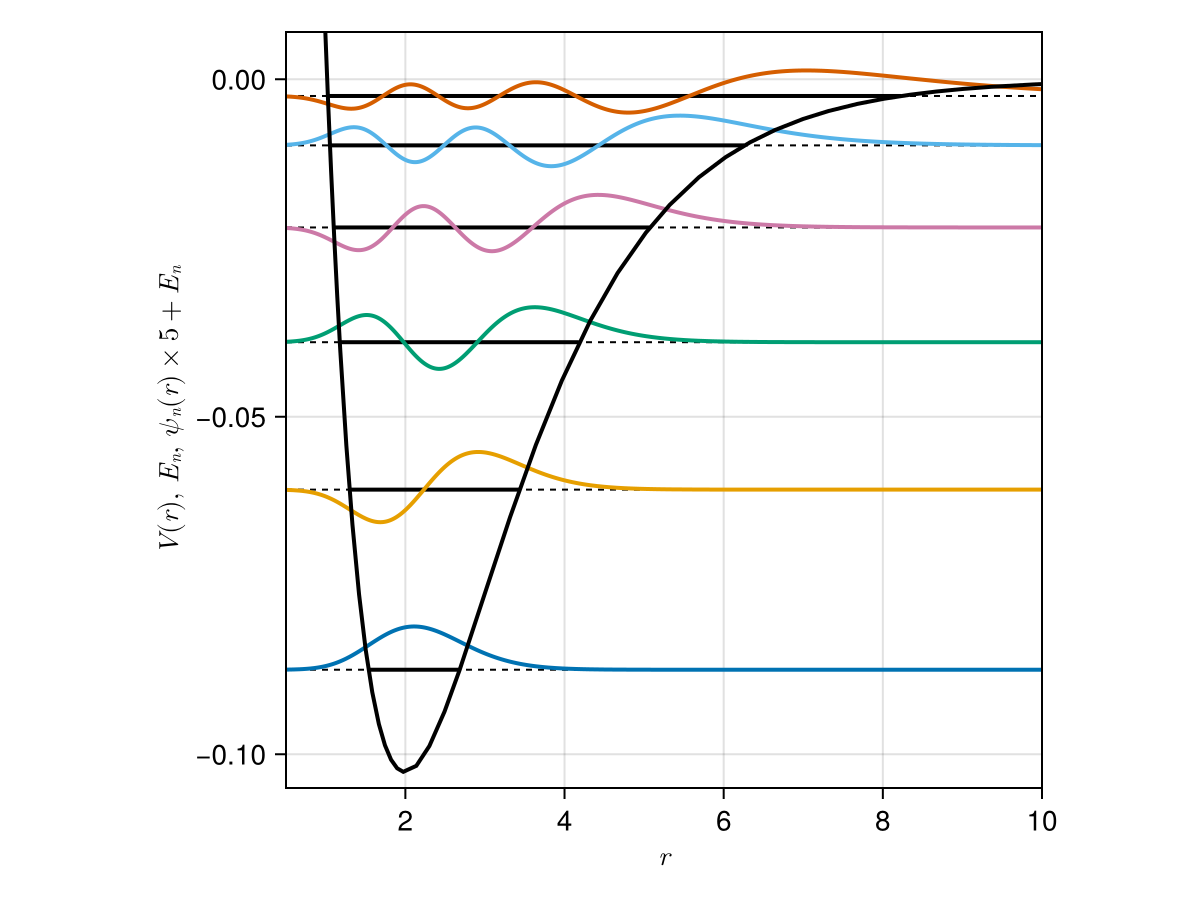

In [19]:
using Antique

# https://physics.nist.gov/cgi-bin/cuu/Value?mmusme
m = 206.7682830
μ = 1 / (1/m + 1/m)
MP = MorsePotential(μ=μ)
@show nₘₐₓ(MP)

using CairoMakie

# settings
f = Figure()
ax = Axis(f[1,1], xlabel=L"$r$", ylabel=L"$V(r),~E_n,~\psi_n(r) \times 5 + E_n$", aspect=1, limits=(0.5,10,-0.105,0.007))
# hidespines!(ax)
# hidedecorations!(ax)

println(nₘₐₓ(MP))

for n in 0:nₘₐₓ(MP)
  # energy
  EMP = E(MP, n=n)
  lines!(ax, 0.1:0.01:15, r -> EMP > V(MP, r) ? EMP : NaN, color=:black, linewidth=2)
  hlines!(ax, E(MP, n=n), color=:black, linewidth=1, linestyle=:dash)
  # wave function
  lines!(ax, 0..10, x -> E(MP,n=n) + 0.0065*ψ(MP,x,n=n), linewidth=2)
end

#potential
lines!(ax, 0..10, x -> V(MP, x), color=:black, linewidth=2)

f

# HydrogenAtom

In [20]:
using Antique
H = HydrogenAtom(Z=1, Eₕ=1.0, a₀=1.0, mₑ=1.0, ℏ=1.0)

HydrogenAtom(1, 1.0, 1.0, 1.0, 1.0)

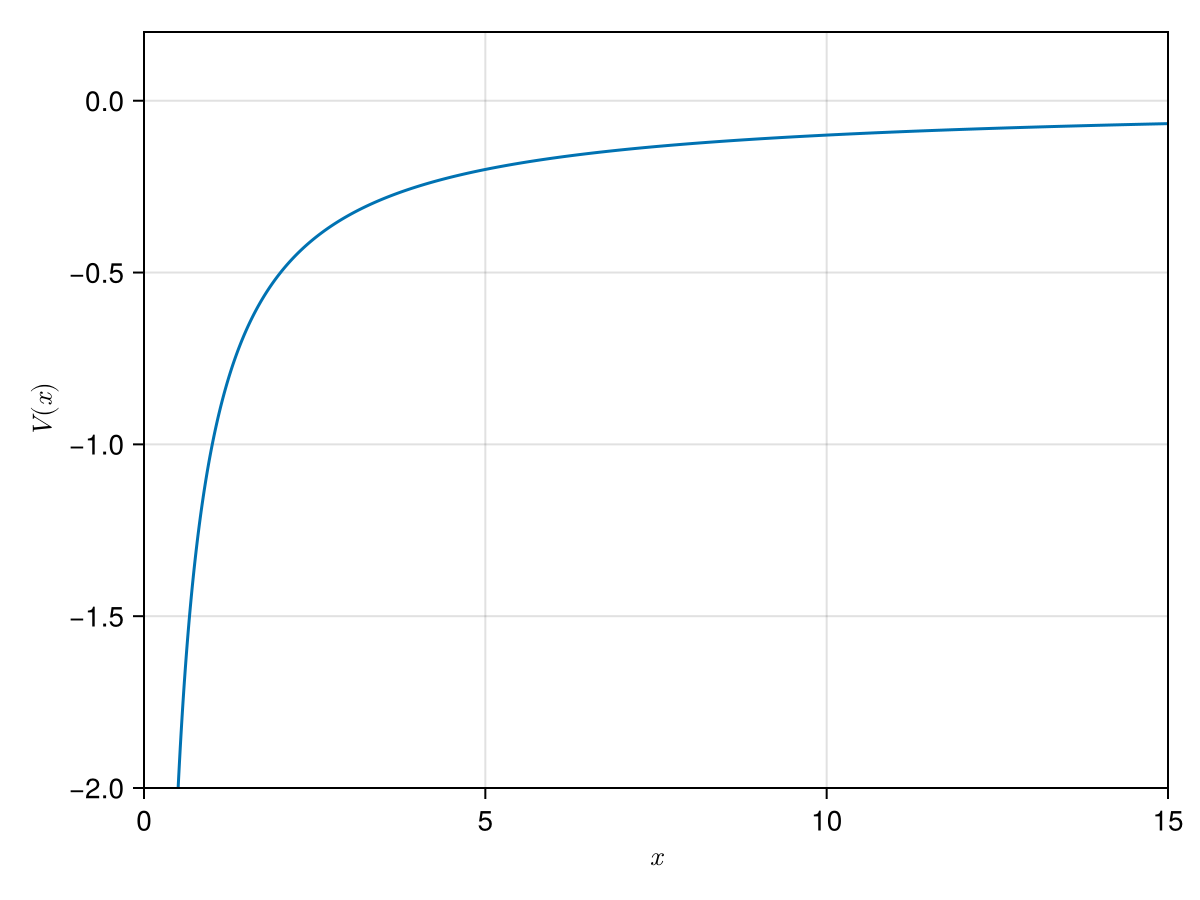

In [21]:
using CairoMakie

f = Figure()
ax = Axis(f[1,1], xlabel=L"$x$", ylabel=L"$V(x)$",  limits=(0.0,15.0,-2.0,0.2))
lines!(ax, 0.1:0.01:20, r -> V(H, r))
f

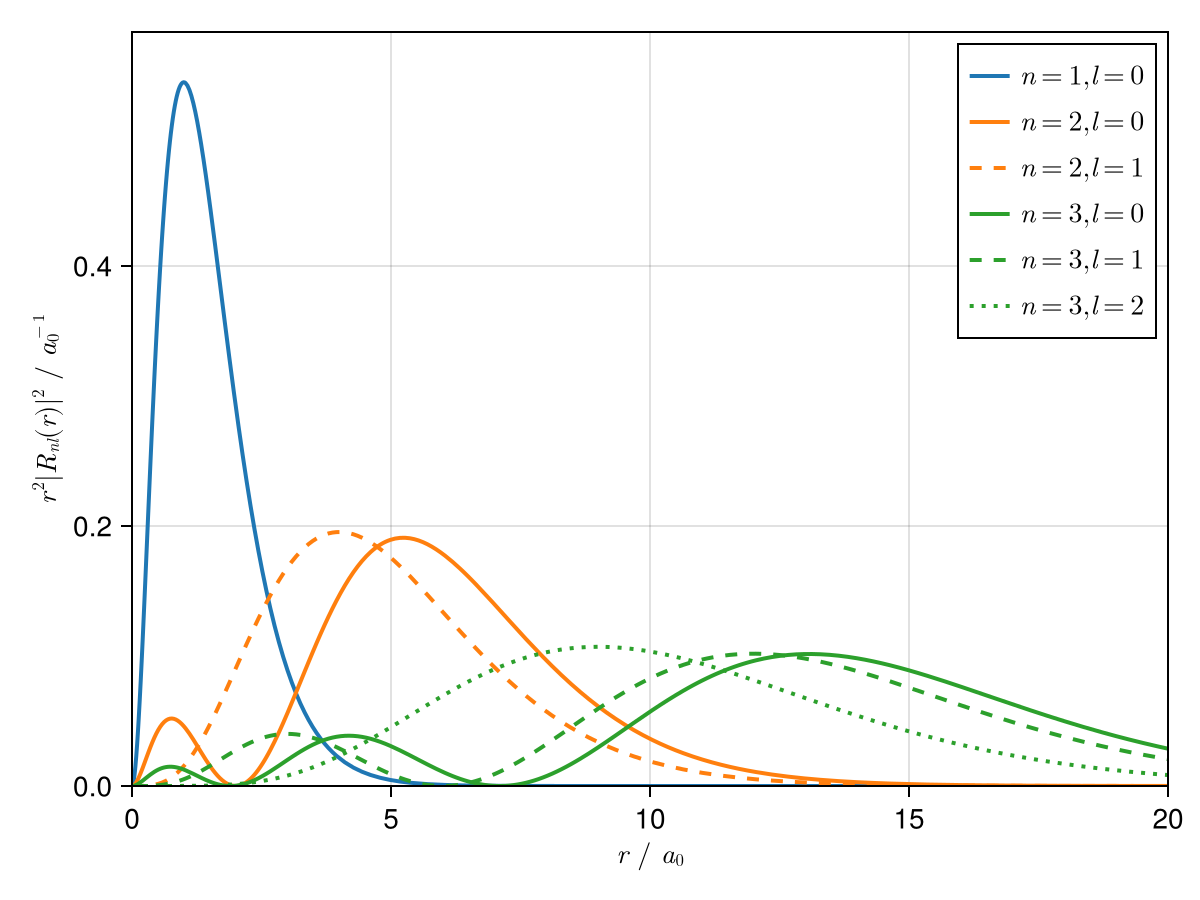

In [22]:
using CairoMakie
using LaTeXStrings

# setting
f = Figure()
ax = Axis(f[1,1], xlabel=L"$r~/~a_0$", ylabel=L"$r^2|R_{nl}(r)|^2~/~a_0^{-1}$", limits=(0,20,0,0.58))

# plot
ws = []
ls = []
for n in 1:3
  for l in 0:n-1
    w = lines!(
        ax,
        0..20,
        r -> r^2 * R(H,r,n=n,l=l)^2,
        linewidth = 2,
        linestyle = [:solid,:dash,:dot,:dashdot,:dashdotdot][l+1],
        color = n,
        colormap = :tab10,
        colorrange = (1,10)
    )
    push!(ws, w)
    push!(ls, latexstring("n=$n, l=$l"))
  end
end

# legend
axislegend(ax, ws, ls, position=:rt)

f

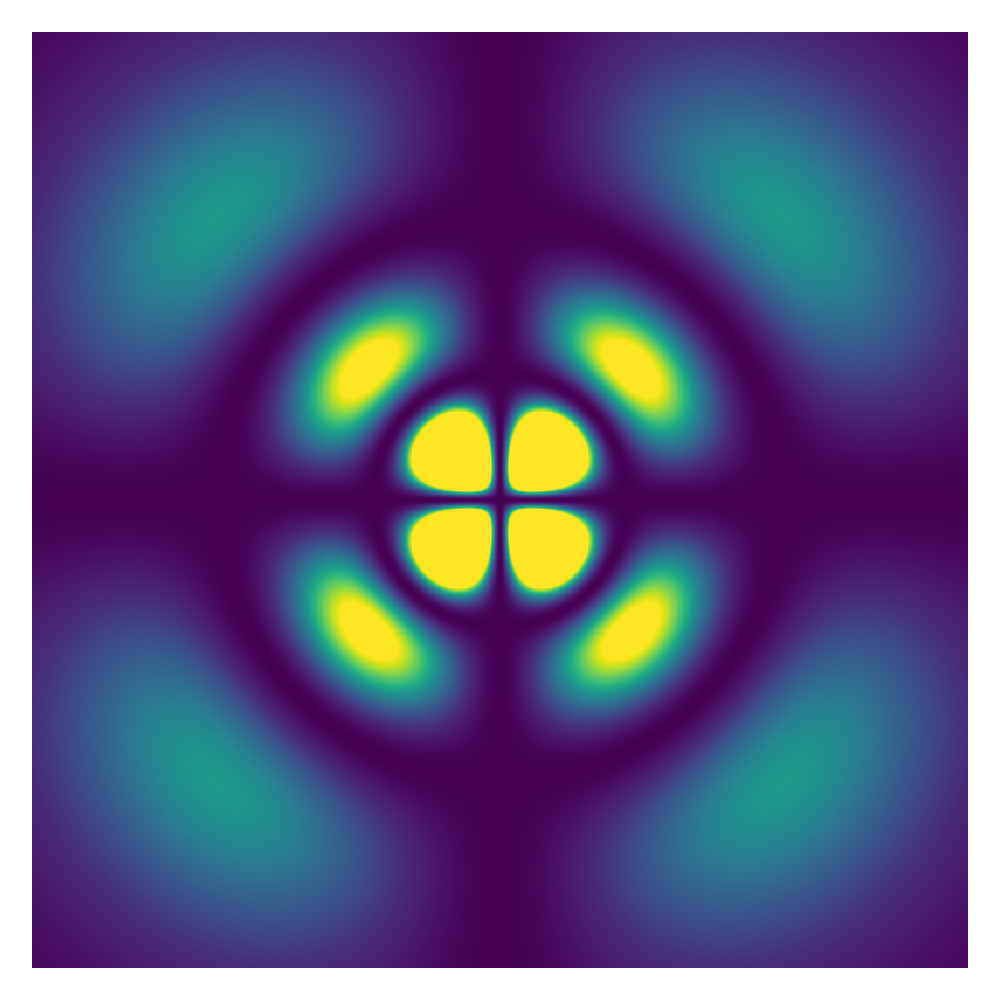

In [23]:
using Antique
H = HydrogenAtom(Z=1, Eₕ=1.0, a₀=1.0, mₑ=1.0, ℏ=1.0)
loop(x) = x<-1 ? loop(x+2) : (1<x ? loop(x-2) : x)
myacos(x) = acos(loop(x))
r(x,y,z)  = sqrt(x^2+y^2+z^2)
θ(x,y,z) = x^2+y^2<1e-9 ? 0 : myacos(z/r(x,y,z))
φ(x,y,z) = y^2<1e-9 ? 0 : sign(y)*myacos(x/sqrt(x^2+y^2))
P(x,y,z) = abs(ψ(H,r(x,y,z),θ(x,y,z),φ(x,y,z),n=5,l=2,m=1))^2

using CairoMakie
f = Figure(size=(500,500), backgroundcolor=:transparent)
a = Axis(f[1,1], aspect=1)
hidespines!(a)
hidedecorations!(a)
heatmap!(a, -40:0.1:40, -40:0.1:40, (y,z) -> P(0,y,z), colorrange=(0.0,0.00001))
f